In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv("Salary_Data.csv")
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.shape[0]
#no. of rows

30

In [36]:
df.isnull().sum()#to find out if there are missing values


YearsExperience    float64
Salary             float64
dtype: object

In [37]:
df.dtypes
# continous type of data

YearsExperience    float64
Salary             float64
dtype: object

# Visualization

In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

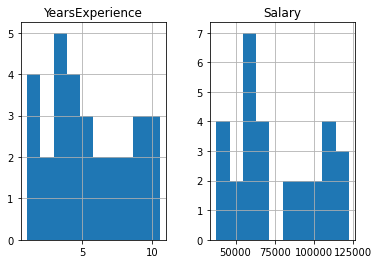

In [25]:
df.hist()

<AxesSubplot:>

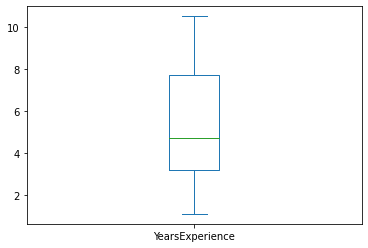

In [23]:
df['YearsExperience'].plot.box()

<AxesSubplot:>

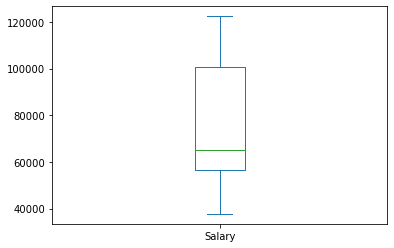

In [24]:
df['Salary'].plot.box()

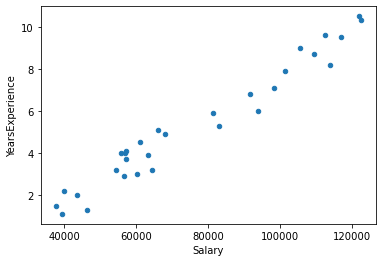

In [41]:
# Scatter plot
df.plot(x='Salary', y='YearsExperience', kind='scatter')

plt.show()
#graph is linear

C:\Users\d970668\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

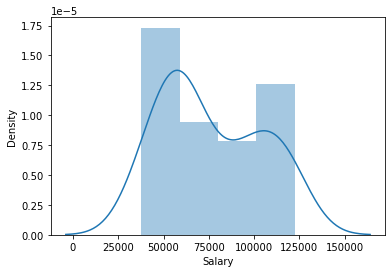

In [43]:
import seaborn as sns
sns.distplot(df['Salary'])


C:\Users\d970668\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

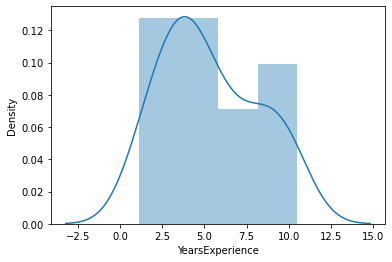

In [44]:
sns.distplot(df['YearsExperience'])

# Correlation Analysis

In [29]:
df.corr()
#correlating all data

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [30]:
df['Salary'].corr(df['YearsExperience'])
#correlating specific data
#positive correlation as the years of experience grow the salary grow hence positive correlation

0.9782416184887598

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

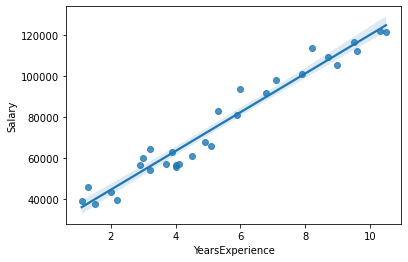

In [45]:
import seaborn as sns
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

# Model Prediction

In [47]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=df).fit()

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        19:49:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

In [49]:
model.params


Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# Testing

In [52]:
#If work experience is 5 years
inter=25792.200199

Sal = 25792.200199 + (9449.962321*5)
print(Sal)

73042.01180400001


In [54]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [57]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [56]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64